In [1]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
cd ~/Documents/MHC_UAM/SexSelect_low_del_dupl/

/home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl


In [3]:
ls

DD_1e6_10k_comperison.csv  optimAlf/
DD_1e6_comperison.csv      optShrd_DD1E6_DataSlice.csv
FigS1.png                  sexSelectComprFull.png
noSex/                     TemplateForPrefererence.json*
noSex_DD1E6_DataSlice.csv  Template.json*


In [15]:
#df = pd.read_csv("DD_1e6_10k_comperison.csv", delimiter=' ')
df = pd.read_csv("DD_1e6_comperison.csv", delimiter=' ')

In [16]:
df.head(10)

,DelDupl,SEXSELECT,patho_mut,patho_spp,meanAllel,stdAllel,slope,indvMean,indvSTD,meanFitt,meanCvFitt,meanPatho,stdPato
0,0.000001,Random,0.00001,8,2.1448,0.86477,0.000170,1.4825,0.49969,0.039810,0.000696,0.021065,0.045818
1,0.000001,Random,0.00001,8,2.7152,1.19820,-0.001075,1.3573,0.47920,0.072955,0.000538,0.059420,0.063784
2,0.000001,Random,0.00001,8,2.8384,1.42810,0.001009,1.3565,0.47898,0.076896,0.000930,0.063913,0.073614
3,0.000001,Random,0.00001,8,3.0256,1.35560,-0.000207,1.2864,0.45208,0.083414,0.000661,0.070294,0.065315
4,0.000001,Random,0.00001,8,3.0352,1.50740,0.001241,1.3837,0.48629,0.086752,0.000957,0.072092,0.072490
5,0.000001,Random,0.00001,8,3.0552,1.42690,-0.000128,1.3999,0.48987,0.091078,0.001337,0.077506,0.079979
6,0.000001,Random,0.00001,8,3.0640,1.50280,0.001067,1.4272,0.49467,0.087117,0.001011,0.072952,0.074760
7,0.000001,Random,0.00001,8,3.0984,1.43300,-0.001556,1.2818,0.44987,0.089046,0.000500,0.078916,0.060422
8,0.000001,Random,0.00001,8,3.1400,1.64500,0.000672,1.2841,0.45096,0.102620,0.000710,0.092699,0.064389
9,0.000001,Random,0.00001,8,3.1480,1.43150,-0.000529,1.3630,0.48085,0.085544,0.000833,0.073167,0.068198


In [17]:
ax_label = 26
T_label = 30
TicksFS = 24

In [23]:
myPallt = ["#6ACC65", "#4878CF", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
palDct = {"4": myPallt[0], "8": myPallt[1], "16": myPallt[2]}
def plotBox(what, df, patho_mut, ymaxx=None, legd=True, mPlt=myPallt):
    """Fast plot of what we want"""
    ax = sns.boxplot(x="SEXSELECT", y=what, hue="DelDupl", data=df, palette=mPlt)
    ax.legend_.remove()
    if legd:
        plt.legend(title="del./dupl. mut.",title_fontsize=TicksFS-4, fontsize=TicksFS-2, loc=2, edgecolor='white')
    #plt.xlabel("sexual selection mode",fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(True, axis="y")
    if ymaxx:
        plt.ylim((0, ymaxx))

In [24]:
df_1e5 = df[df.patho_mut == 1e-5]
df_5e5 = df[df.patho_mut == 5e-5]

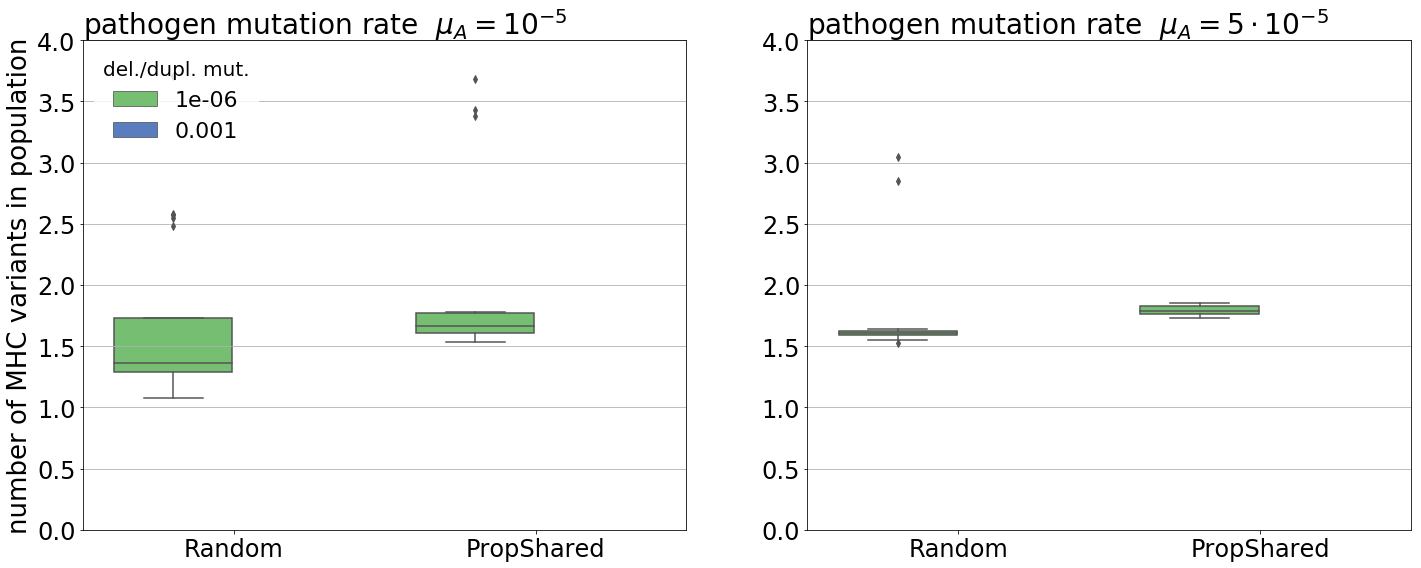

In [30]:
plt.figure(figsize=(20,8))

patho_mut = 0.00001
plt.subplot(121)
what = "indvMean"
plotBox(what, df_1e5, patho_mut, 4, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in population", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(122)
what = "indvMean"
plotBox(what, df_5e5, patho_mut, 4, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("FigS1.png")
plt.show()

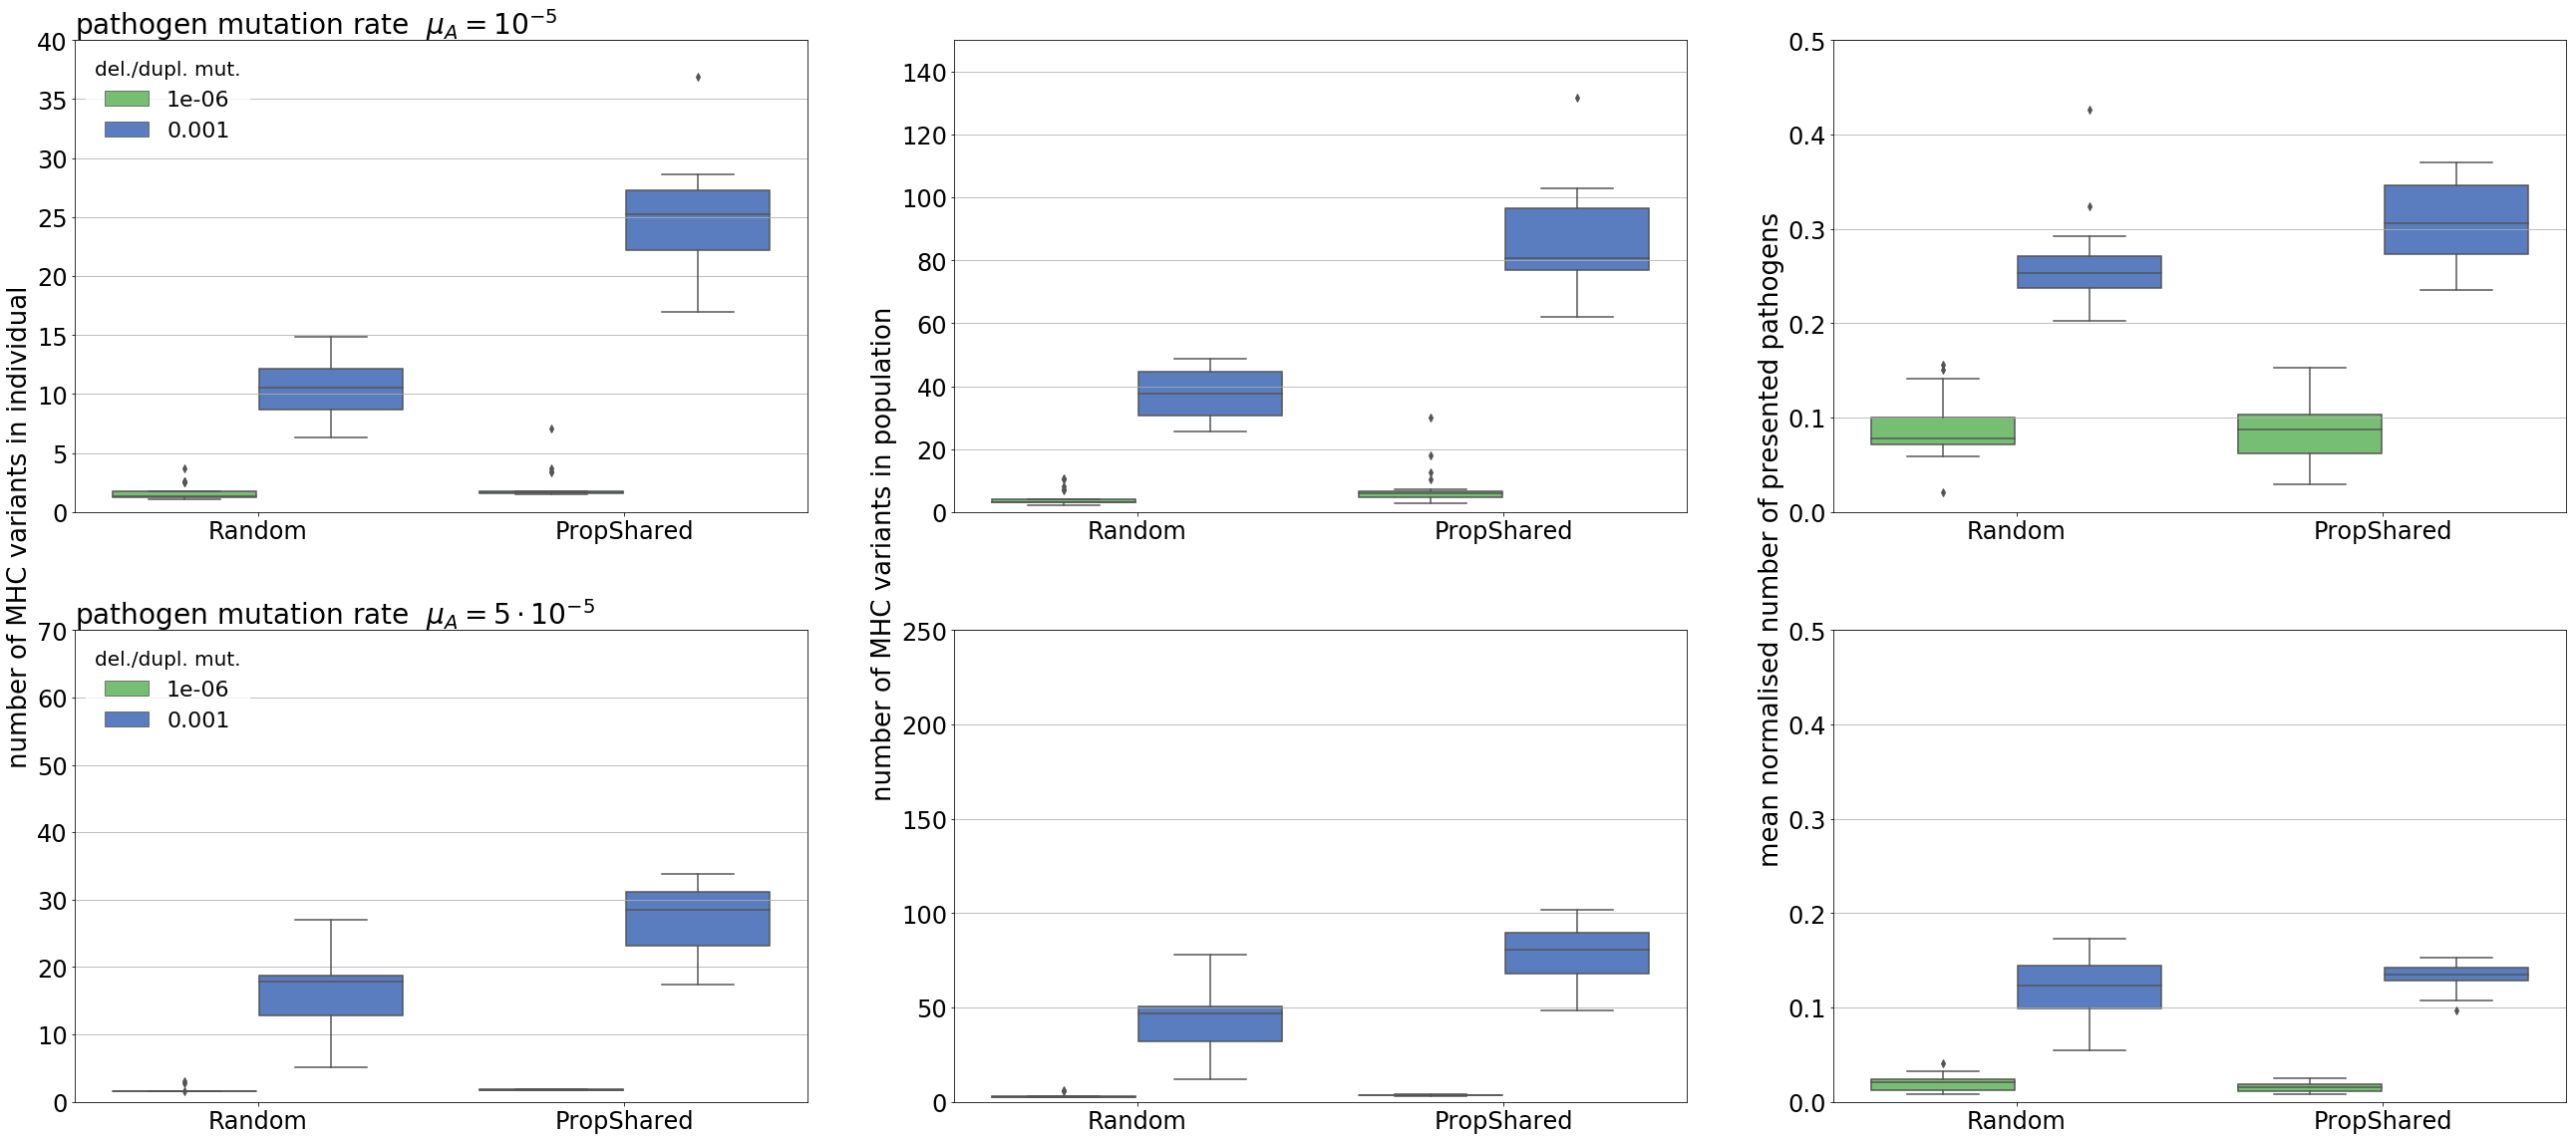

In [21]:
plt.figure(figsize=(36,16))

patho_mut = 0.00001
plt.subplot(231)
what = "indvMean"
plotBox(what, df_1e5, patho_mut, 40, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("number of MHC variants in individual", fontsize=ax_label)
plt.subplot(232)
what = "meanAllel"
plotBox(what, df_1e5, patho_mut, 150, False)
#plt.ylabel("number of MHC variants in population", fontsize=ax_label)
plt.subplot(233)
what = "meanPatho"
plotBox(what, df_1e5, patho_mut, 0.5, False)
#plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(234)
what = "indvMean"
plotBox(what, df_5e5, patho_mut, 70, True)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')
plt.subplot(235)
what = "meanAllel"
plotBox(what, df_5e5, patho_mut, 250, False)
plt.ylabel("        number of MHC variants in population", fontsize=ax_label, horizontalalignment='left')
plt.subplot(236)
what = "meanPatho"
plotBox(what, df_5e5, patho_mut, 0.5, False)
plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label, horizontalalignment='left')
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("sexSelectComprFull.png")
plt.show()

# 